In [39]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.models import load_model
from keras import optimizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
import os
%matplotlib inline

In [11]:
cat_path = 'CATS_DOGS/train/CAT/'

In [12]:
cat_train_list = os.listdir(path)

In [13]:
print(len(cat_train_list))

9310


In [14]:
pixel = 60

In [15]:
data = []
#X = np.zeros((int(len(cat_train_list)),60*60*3+1))

In [16]:
i=0
for i in tqdm(range(int(len(cat_train_list)))):
    pic = cv2.imread(cat_path+cat_train_list[i])
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = pic/255
    pic = cv2.resize(pic,(pixel,pixel))
    data.append([pic,0])

100%|██████████████████████████████████████████████████████████████████████████████| 9310/9310 [03:54<00:00, 45.23it/s]


In [17]:
dog_path = 'CATS_DOGS/train/DOG/'

In [18]:
dog_train_list = os.listdir(dog_path)

In [19]:
i=0
for i in tqdm(range(int(len(dog_train_list)))):
    pic = cv2.imread(dog_path+dog_train_list[i])
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = cv2.resize(pic,(pixel,pixel))
    pic = pic/255
    data.append([pic,1])

100%|██████████████████████████████████████████████████████████████████████████████| 9282/9282 [03:39<00:00, 42.21it/s]


In [20]:
data = np.array(data)

In [21]:
np.random.shuffle(data)

In [22]:
print(data.shape)

(18592, 2)


In [34]:
data[0][0].shape

(60, 60, 3)

In [26]:
X = []
Y = []
length = data.shape[0]
for i in tqdm(range(length)):
    X.append(data[i][0])
    Y.append(data[i][1])
X = np.array(X)
Y = np.array(Y)
Y = np.reshape(Y,(Y.shape[0],1))

100%|████████████████████████████████████████████████████████████████████████| 18592/18592 [00:00<00:00, 595071.12it/s]


In [35]:
Y = to_categorical(Y)

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [40]:
model = Sequential()
model.add(Conv2D(32, kernel_size=5, activation='relu', input_shape=(pixel,pixel,X_train.shape[3]), padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=4, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size=3, activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

W1219 23:59:30.431161  1532 deprecation_wrapper.py:119] From g:\anaconda3\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(X_train, Y_train,validation_split = 0.2, batch_size=128, epochs=30,verbose=2)

W1220 00:01:20.417254  1532 deprecation_wrapper.py:119] From g:\anaconda3\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 11898 samples, validate on 2975 samples
Epoch 1/30
 - 19s - loss: 0.6834 - accuracy: 0.5532 - val_loss: 0.6619 - val_accuracy: 0.6168
Epoch 2/30
 - 15s - loss: 0.6396 - accuracy: 0.6341 - val_loss: 0.6308 - val_accuracy: 0.6538
Epoch 3/30
 - 16s - loss: 0.5960 - accuracy: 0.6883 - val_loss: 0.5831 - val_accuracy: 0.6968
Epoch 4/30
 - 16s - loss: 0.5478 - accuracy: 0.7239 - val_loss: 0.5362 - val_accuracy: 0.7351
Epoch 5/30
 - 16s - loss: 0.5169 - accuracy: 0.7432 - val_loss: 0.5274 - val_accuracy: 0.7398
Epoch 6/30
 - 18s - loss: 0.4928 - accuracy: 0.7652 - val_loss: 0.5020 - val_accuracy: 0.7590
Epoch 7/30
 - 16s - loss: 0.4844 - accuracy: 0.7662 - val_loss: 0.4992 - val_accuracy: 0.7597
Epoch 8/30
 - 17s - loss: 0.4686 - accuracy: 0.7753 - val_loss: 0.5077 - val_accuracy: 0.7533
Epoch 9/30
 - 17s - loss: 0.4581 - accuracy: 0.7828 - val_loss: 0.4892 - val_accuracy: 0.7617
Epoch 10/30
 - 16s - loss: 0.4390 - accuracy: 0.7977 - val_loss: 0.4820 - val_accuracy: 0.7654
Epoch 11/3

In [43]:
model.evaluate(X_test,Y_test)

3719/3719 [==============================] - ETA: 10 - ETA: 8 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 7s 2ms/step


[0.4555520286929322, 0.8101640343666077]

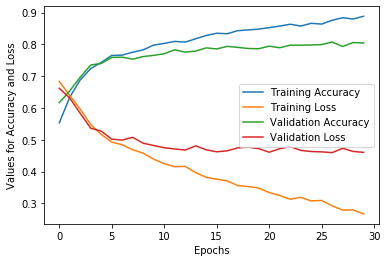

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Values for Accuracy and Loss')
plt.legend(['Training Accuracy','Training Loss','Validation Accuracy','Validation Loss'])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 16)        8208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)              

In [57]:
model.save('CatDogCNN.h5')

In [58]:
def checkCatOrDog(img_path):
    """
    Takes image that is to be tested, as the input and outputs whether it is a cat or a dog. 
    """
    target = ['Cat','Dog']
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    feed_img = cv2.resize(img,(pixel,pixel))
    cd_model = load_model('CatDogCNN.h5')
    pr = cd_model.predict_classes(feed_img.reshape(1,pixel,pixel,X_train.shape[3]))
    print(target[pr[0]])
    plt.imshow(img)
    plt.show()

Cat


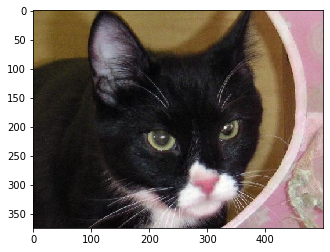

In [61]:
checkCatOrDog('CATS_DOGS/test/CAT/10001.jpg')